importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

data collection and analysis

In [2]:
#loading the dataset from csv file to a pandas dataframe

superstore_data = pd.read_csv('https://github.com/ChandanaPulikanti/Data-files/raw/main/Superstore.csv',encoding='windows-1254')

In [3]:
#firast 5 rows of dataset

superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
superstore_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Here profit column is our target variable and remaining are feature variables

In [5]:
#number of dat points and number of features
superstore_data.shape

(9994, 21)

In [6]:
# getting some information about the dataset
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
superstore_data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Numerical Features

In [8]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


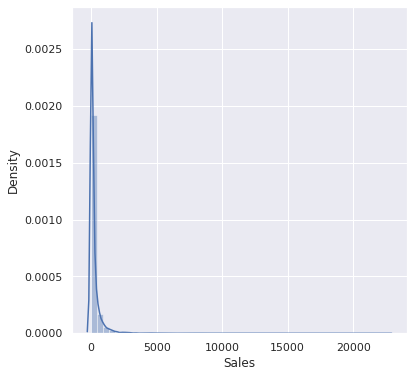

In [9]:
#Sales distribution

plt.figure(figsize=(6,6))
sns.distplot(superstore_data['Sales'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


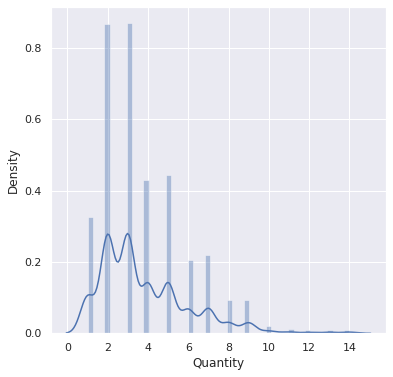

In [10]:
#Quantity distribution

plt.figure(figsize=(6,6))
sns.distplot(superstore_data['Quantity'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


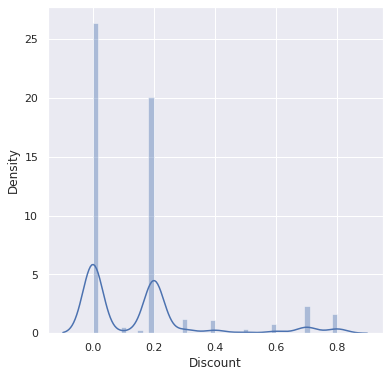

In [11]:
#Discount distribution

plt.figure(figsize=(6,6))
sns.distplot(superstore_data['Discount'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


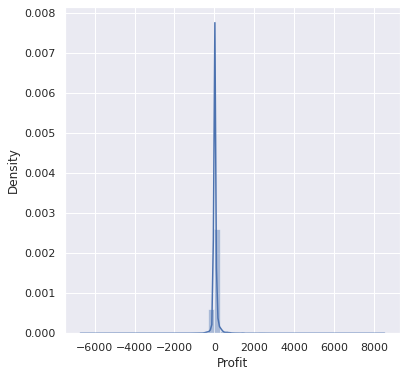

In [12]:
#Profit distribution

plt.figure(figsize=(6,6))
sns.distplot(superstore_data['Profit'])
plt.show()

categorical analysis

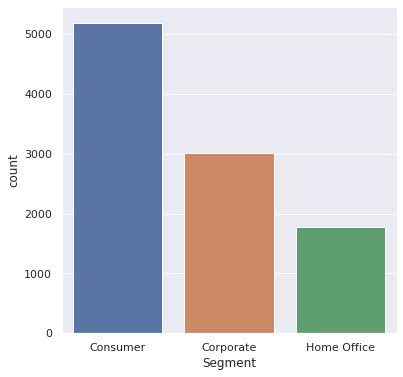

In [13]:
#Segment distribution

plt.figure(figsize=(6,6))
sns.countplot(x= 'Segment',data=superstore_data)
plt.show()

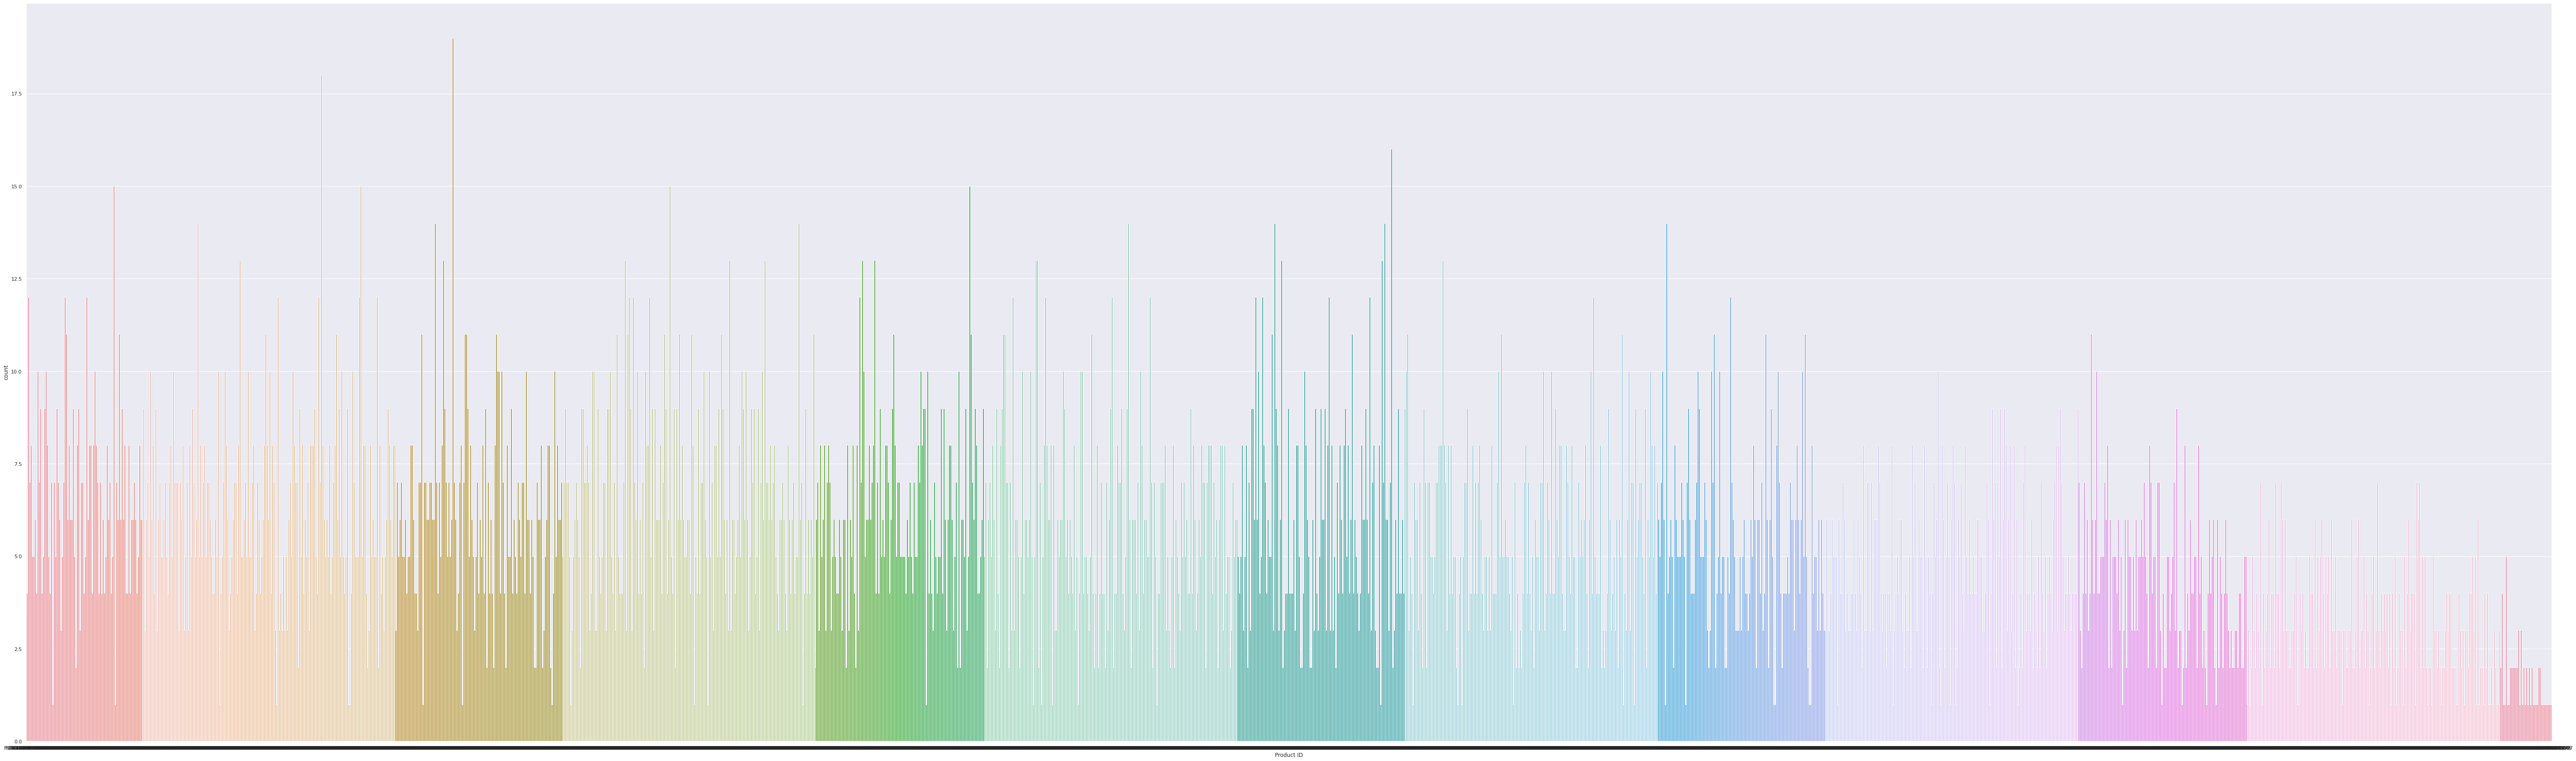

In [14]:
#Product ID distribution

plt.figure(figsize=(100,30))
sns.countplot(x= 'Product ID',data=superstore_data)
plt.show()

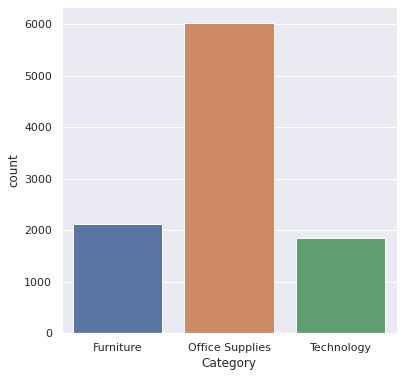

In [15]:
#Category  distribution

plt.figure(figsize=(6,6))
sns.countplot(x= 'Category',data=superstore_data)
plt.show()

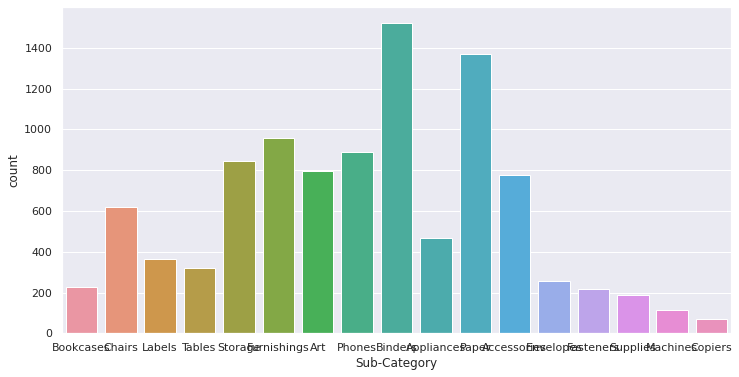

In [16]:
#Sub-Category  distribution

plt.figure(figsize=(12,6))
sns.countplot(x= 'Sub-Category',data=superstore_data)
plt.show()

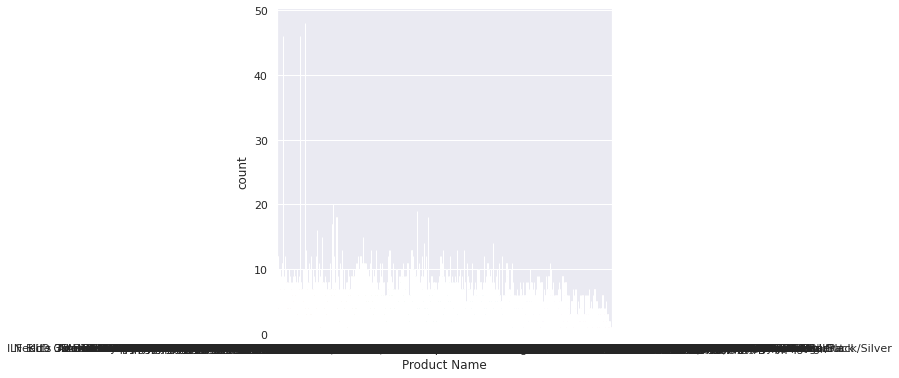

In [17]:
#Product Name  distribution

plt.figure(figsize=(6,6))
sns.countplot(x= 'Product Name',data=superstore_data)
plt.show()

Data pre-processing

In [18]:
encoder = LabelEncoder()

In [19]:
superstore_data['Segment'] = encoder.fit_transform(superstore_data['Segment'])
superstore_data['Product ID'] = encoder.fit_transform(superstore_data['Product ID'])
superstore_data['Category'] = encoder.fit_transform(superstore_data['Category'])
superstore_data['Sub-Category'] = encoder.fit_transform(superstore_data['Sub-Category'])
superstore_data['Product Name'] = encoder.fit_transform(superstore_data['Product Name'])


In [20]:
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,0,United States,Henderson,...,42420,South,12,0,4,386,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,0,United States,Henderson,...,42420,South,55,0,5,839,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,1,United States,Los Angeles,...,90036,West,946,1,10,1433,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,...,33311,South,319,0,16,366,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,...,33311,South,1316,1,14,573,22.3680,2,0.20,2.5164


splitting features and target

In [21]:
X = superstore_data[['Segment','Product ID','Category','Sub-Category','Product Name','Sales','Quantity','Discount']]
Y = superstore_data['Profit']

In [22]:
print(X)

      Segment  Product ID  Category  Sub-Category  Product Name     Sales  \
0           0          12         0             4           386  261.9600   
1           0          55         0             5           839  731.9400   
2           1         946         1            10          1433   14.6200   
3           0         319         0            16           366  957.5775   
4           0        1316         1            14           573   22.3680   
...       ...         ...       ...           ...           ...       ...   
9989        0         200         0             9          1586   25.2480   
9990        0         164         0             9          1535   91.9600   
9991        0        1816         2            13            47  258.5760   
9992        0        1247         1            12           929   29.6000   
9993        0         433         1             1            54  243.1600   

      Quantity  Discount  
0            2      0.00  
1            3      0

In [23]:
print(Y)

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64


splitting tha data into training data and testing data

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)


In [25]:
print(X.shape,X_train.shape,X_test.shape)

(9994, 8) (7995, 8) (1999, 8)


machine learning model training

In [26]:
regressor = XGBRegressor()

In [27]:
regressor.fit(X_train, Y_train)

[03:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

In [28]:
#prediction on training data

training_data_prediction = regressor.predict(X_train)

In [30]:
r2_train = metrics.r2_score(Y_train,training_data_prediction)

In [31]:
print("R squared value of train data is: ",r2_train)

R squared value of train data is:  0.9501830787184379


In [32]:
#prediction on testing data

test_data_prediction = regressor.predict(X_test)

In [33]:
#R squared value
r2_test = metrics.r2_score(Y_test,test_data_prediction)

In [34]:
print("R squared value of testdata is:  ",r2_test)

R squared value of testdata is:   0.8977327550080352
